#Nombre de la entrega: Actividad Semanal 4
#Nombre: Maximiliano Morones Gómez
#Matrícula: A01793815
#Materia: Ciencia y analítica de datos
#Profesor: Jobish Vallikavungal Devassia
#Fecha: 10/10/2022
#Fecha de entrega: 11/10/2022

In [1]:
import pandas as pd
import numpy as np

input= 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv' # Como primera 
# parte procedemos a realizar una copia del dataframe con los datos originales.


In [2]:
input_df = pd.read_csv(input)
df = input_df.copy()

df.dropna(axis = 0, inplace=True) # Procedemos a tomar cada uno de los valores vacíos, con la finalidad de no obtener un error al aplicar el PCA.
df.head

<bound method NDFrame.head of           ID      X1   X2   X3   X4    X5   X6   X7   X8   X9  ...      X15  \
0          1   20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...      0.0   
1          2  120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   3272.0   
2          3   90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...  14331.0   
3          4   50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  ...  28314.0   
4          5   50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  ...  20940.0   
...      ...     ...  ...  ...  ...   ...  ...  ...  ...  ...  ...      ...   
29995  29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  ...  88004.0   
29996  29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  ...   8979.0   
29997  29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  ...  20878.0   
29998  29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  ...  52774.0   
29999  30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X

Como siguiente parte nos interesa conocer cuáles son las variables numéricas del conjunto de datos con el que se está trabajando, esto se debe a que la técnica de PCA la cual utilizaremos más adelante, solo trabaja con variables continuas y no categóricas.


Las variables numéricas son aquellas que se encargan de realizar la cuantificación de algo, mientras que las categóricas como su nombre lo indica solo representan una categoría 

Para poder conocer a las variables numéricas primero procedemos a explorar cada uno de los datos exportados con anterioridad.

In [3]:
df.info() #Este comando ayuda a conocer cuantas filas de datos y columnas hay, así como el tipo de dato de cada columna.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      29958 non-null  int64  
 1   X1      29958 non-null  int64  
 2   X2      29958 non-null  float64
 3   X3      29958 non-null  float64
 4   X4      29958 non-null  float64
 5   X5      29958 non-null  float64
 6   X6      29958 non-null  float64
 7   X7      29958 non-null  float64
 8   X8      29958 non-null  float64
 9   X9      29958 non-null  float64
 10  X10     29958 non-null  float64
 11  X11     29958 non-null  float64
 12  X12     29958 non-null  float64
 13  X13     29958 non-null  float64
 14  X14     29958 non-null  float64
 15  X15     29958 non-null  float64
 16  X16     29958 non-null  float64
 17  X17     29958 non-null  float64
 18  X18     29958 non-null  float64
 19  X19     29958 non-null  float64
 20  X20     29958 non-null  float64
 21  X21     29958 non-null  float64
 22

Como podemos observar en el conjunto de datos anterior, contamos con 30,000 filas de información (entradas). Así como las columnas "ID", "X1" y "X2" son de tipo int y float para el caso de "X2".

De acuerdo con los datos inferiores de la tabla, podemos decir que contamos con 23 variables de tipo float, y 2 variables de tipo int. Con esto podemos concluir que contamos con 25 variables numéricas.

Una vez que ya conocemos a las variables numéricas, procedemos a ver la correlación que existe entre las variables ya mencionadas, sin pasar por alto que primero es indispensable realizar la extracción de las columnas con variables numéricas.

In [4]:
#El siguiente codigo tiene la función de avisarle a pandas que necesito que me proporcione todas las filas.
df_num = df.iloc[:,0:]
df_num.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Una vez que realizamos la extracción de las columnas, procedemos a buscar la correlación que existe entre las variables.

In [5]:
df_num.corr()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,1.000000,0.026230,0.019466,0.038794,-0.028700,0.019104,-0.030036,-0.010967,-0.018695,-0.003163,...,0.040379,0.016807,0.016773,0.009673,0.008374,0.039068,0.007752,0.000616,0.002889,-0.013991
X1,0.026230,1.000000,0.024212,-0.219120,-0.107801,0.144515,-0.271201,-0.296206,-0.286245,-0.267371,...,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567,-0.153781
X2,0.019466,0.024212,1.000000,0.014701,-0.031478,-0.091259,-0.057637,-0.070690,-0.065648,-0.059586,...,-0.021854,-0.017056,-0.016733,-0.000297,-0.001517,-0.008630,-0.002369,-0.001775,-0.002911,-0.039730
X3,0.038794,-0.219120,0.014701,1.000000,-0.143431,0.175079,0.105636,0.121632,0.114012,0.108640,...,-0.000566,-0.007625,-0.009192,-0.037385,-0.030007,-0.039953,-0.038263,-0.040276,-0.037189,0.028109
X4,-0.028700,-0.107801,-0.031478,-0.143431,1.000000,-0.413926,0.019747,0.024052,0.032430,0.032826,...,-0.023292,-0.025371,-0.021206,-0.005705,-0.008016,-0.003399,-0.012516,-0.001052,-0.006571,-0.024544
X5,0.019104,0.144515,-0.091259,0.175079,-0.413926,1.000000,-0.039432,-0.050154,-0.053249,-0.049865,...,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533,0.013881
X6,-0.030036,-0.271201,-0.057637,0.105636,0.019747,-0.039432,1.000000,0.672290,0.574706,0.539384,...,0.179138,0.180651,0.176992,-0.079230,-0.070083,-0.070460,-0.063934,-0.058104,-0.058616,0.324769
X7,-0.010967,-0.296206,-0.070690,0.121632,0.024052,-0.050154,0.672290,1.000000,0.766857,0.662429,...,0.222216,0.221287,0.219339,-0.080771,-0.058981,-0.055864,-0.046856,-0.037049,-0.036491,0.263761
X8,-0.018695,-0.286245,-0.065648,0.114012,0.032430,-0.053249,0.574706,0.766857,1.000000,0.777245,...,0.227518,0.225453,0.222608,0.001210,-0.066784,-0.053294,-0.046001,-0.035813,-0.035816,0.235765
X9,-0.003163,-0.267371,-0.059586,0.108640,0.032826,-0.049865,0.539384,0.662429,0.777245,1.000000,...,0.246180,0.243161,0.239379,-0.009475,-0.001893,-0.069260,-0.043421,-0.033630,-0.026537,0.217037


Para poder visualizar de una mejor manera la información que se encuentra presente en la tabla, hacemos uso de lo siguiente.

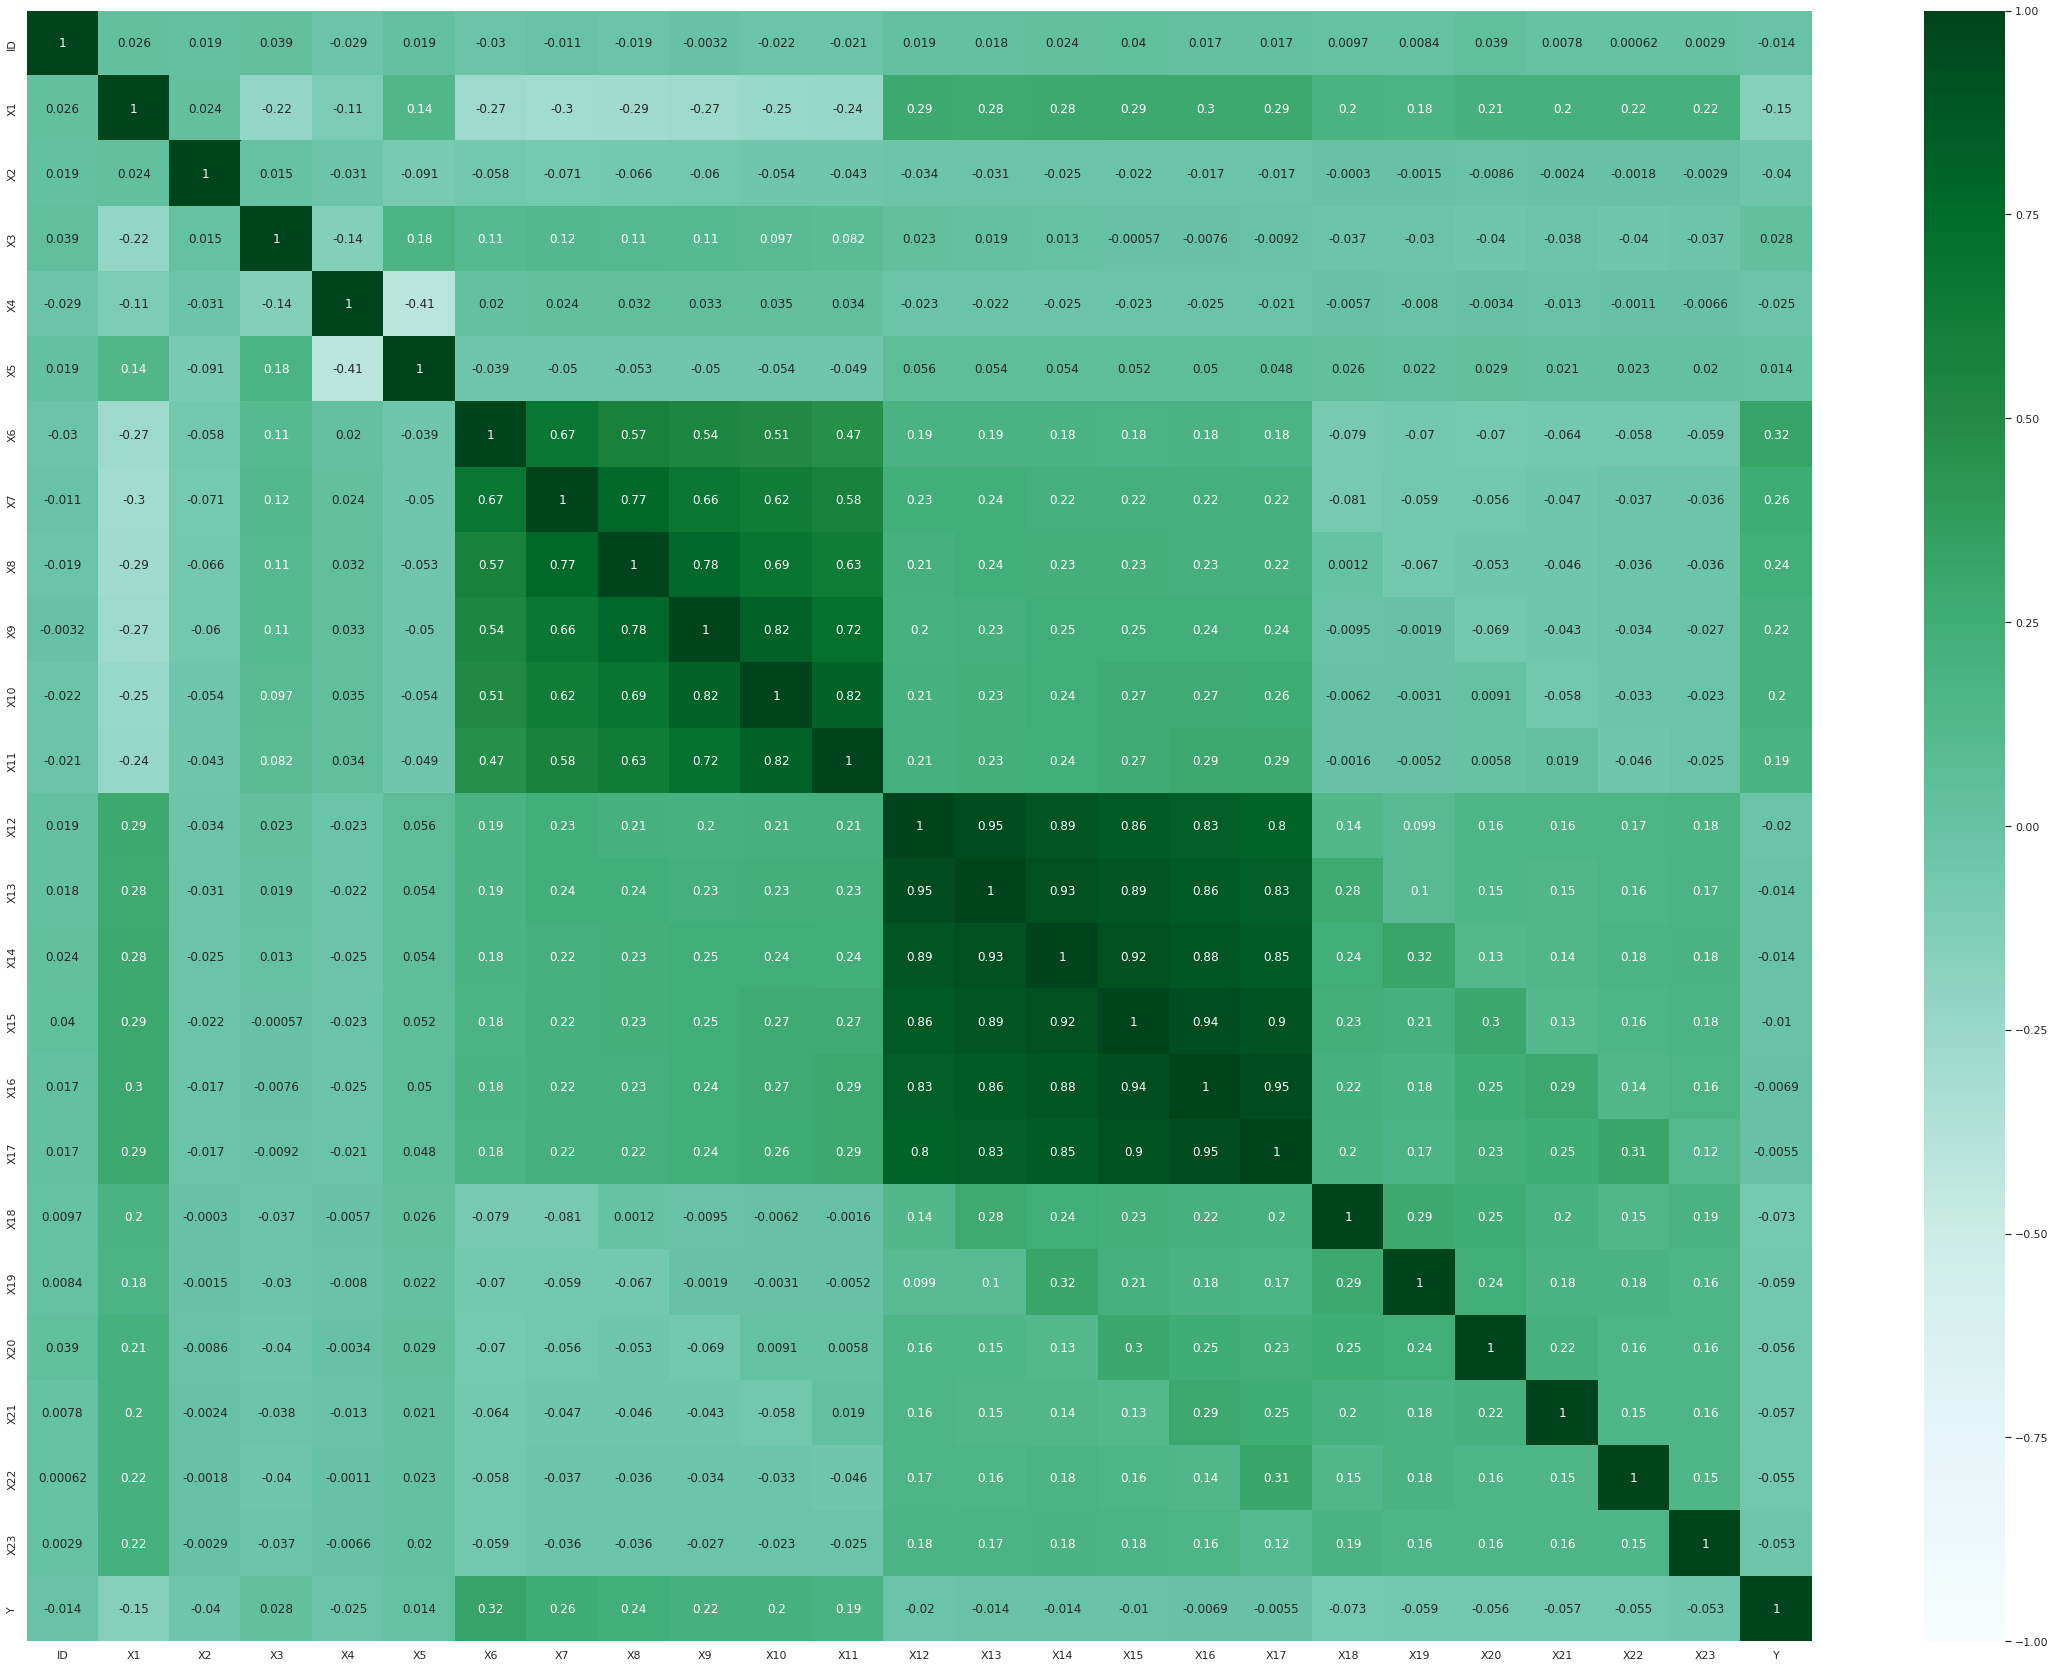

In [6]:
import seaborn as sns

corrs = df_num.corr()

sns.set(rc = {'figure.figsize':(40,30)})
sns.heatmap(corrs, vmin = -1, vmax= 1, cmap = "BuGn", annot= True)

Ahora podemos visualizar la información contenida en la tabla anterior de una mejor manera, las casillas en las cuales podemos encontrar los datos se encuentran conformadas por diferentes tonalidades del color verde, de manera que mientras más oscura sea la tonalidad del color verde, más estrecha será la correlación positiva, mientras más se acerque al color blanco será más negativa y cuando la correlación tienda a ser cero el color será de color verde claro.

Como siguiente parte procedemos a visualizar las varianzas de algunas de las variables.

In [7]:
cols = ["X13", "X14", "X15"] #Definimos algunas de las variables que nos interesa analizar

#Creamos un objeto que contiene los datos estadísticos que son de nuestro interes y sus valores.
summary = {"Varianzas": df_num[cols].var()[0:3], "Valor Min": df_num[cols].var()[0:3], "Valor Max": df_num[cols].max()[0:3]}
pd.DataFrame(summary, index = cols).transpose() # El tranpose se encarga de convertir las columnas en filas y viceversa.


,X13,X14,X15
Varianzas,5.071040e+09,4.814312e+09,4.142813e+09
Valor Min,5.071040e+09,4.814312e+09,4.142813e+09
Valor Max,9.839310e+05,1.664089e+06,8.915860e+05


Tomando en cuenta los valores obtenidos y lo que nos dice la varianza, el valor de esta última puede verse afectado seriamente debido a la magnitud que presentan las variables. Así como también esto genera un problema debido a que PCA hace uso de las varianzas.

Para entender mejor lo planteado en el punto anterior, buscamos el porcentaje total de las varianzas que representan cada una de las variables.

In [8]:
t = df_num.var().sum() # Buscamos la varianza total de cada una de las variables.

#Calculamos la varianza para cada una de las variables que se están estudiando.
var_X13 = df_num.X13.var()
var_X14 = df_num.X14.var()
var_X15 = df_num.X15.var()

#Procedemos a calcular el porcentaje que representa la varianza de cada una de las variables respecto al total.
print('Varianza Total \t\t:',t.round(2))
print('Varianza X13 \t:', ((var_X13/t)*100).round(2), '%')
print('Varianza X14 \t\t:', ((var_X14/t)*100).round(2), '%')
print('Varianza X15 \t:', ((var_X15/t)*100).round(2), '%')

Varianza Total 		: 45525093894.66
Varianza X13 	: 11.14 %
Varianza X14 		: 10.58 %
Varianza X15 	: 9.1 %


Para poder dar solución al problema relacionado con PCA procedemos a escalar los datos, esto nos permitirá que todos los datos se encuentren en una misma escala.

De modo que para poder escalar los datos haremos uso del StandardScaler de la librería scikit.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df_num)
# Es necesario tomar en cuenta que son demasiados valores, así que se imprimen los primeros 5.
scaled[:5]

array([[-1.7337476 , -1.13736269,  0.8096885 ,  0.18584882, -1.05708615,
        -1.24628151,  1.79464177,  1.78258329, -0.69667977, -0.66663037,
        -1.53070038, -1.48651337, -0.64249667, -0.64735943, -0.66792529,
        -0.67241933, -0.66303081, -0.65271388, -0.34188963, -0.22713422,
        -0.29678248, -0.30810735, -0.31412418, -0.29348473,  1.87668918],
       [-1.73363205, -0.36656147,  0.8096885 ,  0.18584882,  0.85883054,
        -1.0292244 , -0.874468  ,  1.78258329,  0.13943643,  0.18924143,
         0.23563523,  1.99391629, -0.65920548, -0.66669659, -0.63920112,
        -0.62158315, -0.6062287 , -0.59798248, -0.34188963, -0.21364509,
        -0.24001926, -0.24431534, -0.31412418, -0.18105373,  1.87668918],
       [-1.73351651, -0.59780183,  0.8096885 ,  0.18584882,  0.85883054,
        -0.16099598,  0.01523526,  0.11194994,  0.13943643,  0.18924143,
         0.23563523,  0.25370146, -0.29873773, -0.49394006, -0.48243607,
        -0.44976246, -0.41727743, -0.39174531, -0

Una vez que hemos obtenido los datos anteriores, procedemos a acomodarlos.

In [10]:
scaled_df = pd.DataFrame(scaled, columns=df_num.columns)
scaled_df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,-1.733748,-1.137363,0.809689,0.185849,-1.057086,-1.246282,1.794642,1.782583,-0.696680,-0.666630,...,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485,1.876689
1,-1.733632,-0.366561,0.809689,0.185849,0.858831,-1.029224,-0.874468,1.782583,0.139436,0.189241,...,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054,1.876689
2,-1.733517,-0.597802,0.809689,0.185849,0.858831,-0.160996,0.015235,0.111950,0.139436,0.189241,...,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407,-0.532853
3,-1.733401,-0.906122,0.809689,0.185849,-1.057086,0.164590,0.015235,0.111950,0.139436,0.189241,...,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269,-0.532853
4,-1.733285,-0.906122,-1.235043,0.185849,-1.057086,2.335161,-0.874468,0.111950,-0.696680,0.189241,...,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314,-0.532853


Con los datos acomodados en una misma escala, procedemos a verificar repitiendo el proceso anterior, pero ahora para el conjunto de datos nuevo.

In [11]:
summary = {"Varianzas": scaled_df[cols].var()[0:3], "Valor Min": scaled_df[cols].min()[0:3], "Valor Max": scaled_df[cols].max()[0:3]}
pd.DataFrame(summary, index = cols).transpose()

,X13,X14,X15
Varianzas,1.000033,1.000033,1.000033
Valor Min,-1.670797,-2.944427,-3.313663
Valor Max,13.126386,23.305872,13.179911


Ahora podemos apreciar que los datos ya se encuentran escalados.

Una vez que los datos se encuentran escalados ahora si podemos proceder a aplicar PCA.

In [12]:
from sklearn.decomposition import PCA
pcs = PCA()
pcs_t = pcs.fit_transform(scaled_df)
pcs_t[:5]

array([[-1.81152719e+00, -1.31109312e+00, -4.79856504e-01,
        -4.96891653e-01, -9.29036583e-01, -1.72752378e+00,
        -8.72848984e-01,  2.81895407e+00,  5.47550839e-01,
        -4.13674173e-01, -2.79043407e-01,  3.53063028e-02,
        -6.11341186e-02,  2.28443597e+00, -9.06892949e-01,
        -3.65093730e-01, -8.98572759e-02,  3.92132963e-01,
        -2.69173727e-01, -9.01295152e-01,  6.17348353e-01,
        -7.33835429e-02,  8.03717878e-03, -5.05734584e-04,
         1.48337724e-02],
       [-6.81177569e-01, -2.44731800e+00,  1.14337338e+00,
        -4.16158879e-01, -5.13314427e-01, -1.62769381e+00,
        -1.86278672e-01,  9.05246390e-01,  5.13277118e-01,
        -1.23088524e-02, -2.14079946e-01,  3.08582488e-01,
         1.78891451e-01, -1.40408745e+00, -1.26953595e-01,
        -3.42237422e-01,  6.95992804e-01,  2.10484035e+00,
         2.00596223e-02, -2.73441900e-01,  8.55840108e-01,
        -1.51615695e-01, -4.23194042e-03, -1.36099060e-02,
         1.09450551e-02],
    

Una vez que ya contamos con los datos obtenidos anteriormente, procedemos a obtener el porcentaje de la varianza explicada por cada componente, así como el acumulado de la varianza explicada por cada componente.

In [13]:
pcsSummary_df = pd.DataFrame({'% Varianza explicada': np.round(pcs.explained_variance_ratio_,4) * 100, 
                              '% Varianza acumulada': np.cumsum(pcs.explained_variance_ratio_)* 100})
pcsSummary_df

,% Varianza explicada,% Varianza acumulada
0,26.21,26.209795
1,16.81,43.021291
2,6.22,49.240922
3,5.90,55.145289
4,4.25,59.391505
5,3.94,63.330989
6,3.88,67.212352
7,3.66,70.871029
8,3.63,74.496981
9,3.54,78.041467


Para poder entender mejor el código, agregamos la siguiente línea, esta crea la lista mostrada anteriormente, pero con los nombres de cada componente, de modo que estos se llamaran PC1, PC2, etc.

In [14]:
pcs_labels = [f'PC{i+1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df

,% Varianza explicada,% Varianza acumulada
PC1,26.21,26.209795
PC2,16.81,43.021291
PC3,6.22,49.240922
PC4,5.90,55.145289
PC5,4.25,59.391505
PC6,3.94,63.330989
PC7,3.88,67.212352
PC8,3.66,70.871029
PC9,3.63,74.496981
PC10,3.54,78.041467


Debido a que los componentes no son las variables originales y que no puedo interpretarlas de esa manera, por consiguiente procedemos a comprobar que los componentes preserven el 100% de la información.

In [15]:
pcs_df = pd.DataFrame(pcs_t, columns  = pcs_labels)
print("Varianza total de las variables originales: ", scaled_df.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

Varianza total de las variables originales:  25.000834529492273
Varianza total de los componentes:  25.00083452949228


Ahora procedemos a determinar cuáles son los componentes principales, pero debido a que la selección es de forma arbitraria, podemos seleccionar a los componentes que expliquen el 80% o más de la variación del conjunto de datos.

Procedemos a observar nuevamente la tabla de las varianzas.

In [17]:
pcsSummary_df

,% Varianza explicada,% Varianza acumulada
PC1,26.21,26.209795
PC2,16.81,43.021291
PC3,6.22,49.240922
PC4,5.90,55.145289
PC5,4.25,59.391505
PC6,3.94,63.330989
PC7,3.88,67.212352
PC8,3.66,70.871029
PC9,3.63,74.496981
PC10,3.54,78.041467


Como podemos observar en la columna correspondiente a varianza acumulada, podemos observar que el 90% de la variación se explica en los primeros 14 componentes.

Dependiendo del número de componentes seleccionados podemos decidir que tanta variación deseamos explicar.

Para el presente caso haremos una comparación con las variables originales, con la finalidad de saber cuantas necesitaremos utilizar para explicar el 90% de la variación.

In [16]:
total_var =scaled_df.var().sum()
pd.DataFrame({"Porcentaje Varianza": (scaled_df.var()/total_var) * 100, "Porcentaje Varianza Acumulado": (scaled_df.var().cumsum() / total_var) *100})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
ID,4.0,4.0
X1,4.0,8.0
X2,4.0,12.0
X3,4.0,16.0
X4,4.0,20.0
X5,4.0,24.0
X6,4.0,28.0
X7,4.0,32.0
X8,4.0,36.0
X9,4.0,40.0


Con la tabla anterior podemos comprobar y dejar en claro que si no se hace uso del método de PCA, sería necesario hacer uso de 23 variables en vez de 14, para poder obtener cerca del 90% de la variación explicada.

Procedemos a ver como es la composición de cada componente arrojado por PCA. Para este caso nos quedamos con los primeros 14 componentes.


In [17]:
comps_df = pd.DataFrame(pcs.components_.round(4), columns = pcs_df.columns, index = scaled_df.columns)
comps_df.iloc[:,:7]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
ID,0.0061,0.0657,-0.0220,0.0199,-0.0056,0.0140,0.1646
X1,0.0229,0.3116,0.0306,-0.0881,-0.0396,0.0629,-0.2968
X2,-0.0598,0.0097,0.0270,-0.3243,0.4746,-0.4841,-0.0205
X3,0.0520,0.0756,-0.0761,0.2224,-0.4179,0.4348,0.0193
X4,0.4997,-0.1851,0.6137,0.4048,0.0192,-0.1601,-0.1032
X5,0.7181,-0.0551,-0.6408,0.0057,0.1748,0.0070,-0.0096
X6,-0.4309,-0.2634,-0.3858,0.4219,0.1652,0.0105,-0.1468
X7,-0.1086,-0.2744,0.0136,0.4556,0.1975,-0.1407,0.2155
X8,-0.0981,0.0096,0.0885,-0.2584,-0.1032,0.0363,-0.0041
X9,-0.0463,-0.0338,-0.0411,0.0584,0.0090,0.0082,-0.0341


De la tabla anterior podemos ver como cada una de las variables originales apoya a los pesos de cada componente.

Procedemos a obtener los valores máximos de cada componente para poder comprender y apreciar mejor la información, para este caso los máximos por filas.

In [18]:
comps_df.iloc[:,:7].abs().idxmax()

PC1     X5
PC2    X15
PC3     X5
PC4     X7
PC5    X14
PC6    X14
PC7    X16
dtype: object

Con esta última tabla podemos apreciar que para el componente 1 X5 es la variable que más contribuye., posteriormente X15 y nuevamente X5.